### Graph Partitioning

We are given a graph $G = (V,E)$ with $V$ being the vertex set and $E$ being the edges set. The aim of the graph partitioning problem is to divide the graph into two subsets with equal number of vertices or size such that the edges connecting both the vertices are minimum. If we look carefully this problem is kind of opposite to the max cut problem but with fixed subset sizes.


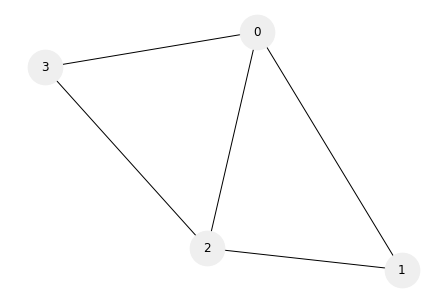

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

options = {'node_color': '#efefef','node_size': 1200,'with_labels':'True'}

n = 4

G = nx.Graph()
G.add_nodes_from(nx.path_graph(n))
G.add_edges_from([(0,1), (0,2), (0,3),(1,2),(2,3)])
nx.draw(G, **options)

When we are creating the Hamiltionian for the above problem, we take into consideration the constarint that both the subsets have equal number of vertices.
Thus the constraint : 
$$ H_C = A(\sum^N_{n=1} s_i)^2 $$

The cost hamiltonian which minimizes the edges between both the subsets is:
$$ H_A = B\sum_{uv \in E} \frac{1 - \sigma_u \sigma_v}{2}$$

The total hamiltonian comes out to be $H = H_A+H_C$.

Reference: https://arxiv.org/abs/1302.5843

In [10]:
from blueqat import vqe
from blueqat.pauli import *
import numpy as np

a = np.zeros((n), dtype=int)

b = np.zeros((n,n), dtype=int)

for k in G.edges:
    b[k[0]][k[1]] = 1
    


In [11]:
h_1 = 0.0
for i in range(n):
    h_1+= Z(i)
    
h_1 = h_1**2


h_2 = 0.0

for i in range(n):
    for j in range(n):
        if(b[i,j]==1):
            h_2+= (1-Z(i)*Z(j))/2
            
            
h = h_1*100 + h_2
    




In [12]:
step = 2

result = vqe.Vqe(vqe.QaoaAnsatz(h, step)).run()
print(result.most_common(4))

(((1, 1, 0, 0), 0.23647950461541928), ((0, 0, 1, 1), 0.23647950461541928), ((0, 1, 1, 0), 0.23647950461541917), ((1, 0, 0, 1), 0.23647950461541917))
